<a href="https://colab.research.google.com/github/ferasraed/Scraping-Google-Scholar/blob/main/CIS711_Case_Stady.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests as rs
from bs4 import BeautifulSoup
import pandas as pd
import urllib.parse
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
scholars = []
header = ['Name', 'University/Company', 'Position', 'Homepage', 'Research Interests', 'Citations', 'h-index', 'i10-index', 'First Publication', 'Co_authors for First Publication', 'Citation for First Publication', 'Second Publication', 'Co_authors for Second Publication', 'Citation for Second Publication']
scholars.append(header)

def collect_data(soup):
    try:
        div_name = soup.find('div', id='gsc_prf_in')
        name = div_name.text.strip()
    except AttributeError:
        name = ''

    try:
        div_company = soup.find('a', class_='gsc_prf_ila')
        if div_company:
            company = div_company.text.strip()
            if company.lower() == 'homepage':
                company = ''
        else:
            div_company = soup.find('div', class_='gsc_prf_il')
            company_text = div_company.get_text().strip()
            company = company_text.split(',')[0]
            if company.lower() == 'homepage':
                company = ''
    except AttributeError:
        company = ''

    try:
        div_position = soup.find('div', class_='gsc_prf_il')
        position = div_position.get_text(strip=True).split(',')[0]
    except AttributeError:
        position = ''

    try:
        a_homepage = soup.find('div', id='gsc_prf_ivh').find('a', class_='gsc_prf_ila')
        homepage_url = a_homepage.get('href')
    except AttributeError:
        homepage_url = ''

    try:
        td_citations = soup.find('td', class_='gsc_rsb_std')
        citations = td_citations.text.strip()
    except AttributeError:
        citations = ''

    try:
        td_h_index = soup.find('td', string='h-index')
        h_index_value = td_h_index.find_next_sibling('td').text.strip()
    except AttributeError:
        h_index_value = ''

    try:
        td_i10_index = soup.find('td', string='i10-index')
        i10_index_value = td_i10_index.find_next_sibling('td').text.strip()
    except AttributeError:
        i10_index_value = ''

    try:
        research_interests_div = soup.find('div', id='gsc_prf_int')
        research_interests = [interest.text.strip() for interest in research_interests_div.find_all('a', class_='gsc_prf_inta')]
    except AttributeError:
        research_interests = []
    title1 = ''
    co_authors1 = ''
    citation1 = ''
    title2 = ''
    co_authors2 = ''
    citation2 = ''
    try:
        publications = soup.find_all('tr', class_='gsc_a_tr')[:1]
        for publication in publications:
            title1 = publication.find('a', class_='gsc_a_at').get_text()
            co_authors1 = publication.find('div', class_='gs_gray').get_text()
            citation1 = publication.find('a', class_='gsc_a_ac').get_text()
    except AttributeError:
        pass

    try:
        publications = soup.find_all('tr', class_='gsc_a_tr')[:2]
        for publication in publications:
            title2 = publication.find('a', class_='gsc_a_at').get_text()
            co_authors2 = publication.find('div', class_='gs_gray').get_text()
            citation2 = publication.find('a', class_='gsc_a_ac').get_text()
    except AttributeError:
        pass

    row = [name, company, position, homepage_url, research_interests, citations, h_index_value, i10_index_value,
          title1, co_authors1, citation1, title2, co_authors2, citation2]
    scholars.append(row)

In [3]:
URLs = ['https://scholar.google.com/citations?hl=en&user=kukA0LcAAAAJ', 'https://scholar.google.com/citations?hl=en&user=ALVSZAYAAAAJ', 'https://scholar.google.com/citations?hl=en&user=Tb0ZrYwAAAAJ', 'https://scholar.google.com/citations?hl=en&user=LnBGQ3QAAAAJ', 'https://scholar.google.com/citations?hl=en&user=FaOcyfMAAAAJ', 'https://scholar.google.com/citations?hl=en&user=OQpf9YsAAAAJ', 'https://scholar.google.com/citations?hl=en&user=hBTsXMgAAAAJ', 'https://scholar.google.com/citations?hl=en&user=wsGvgA8AAAAJ', 'https://scholar.google.com/citations?hl=en&user=wsGvgA8AAAAJ', 'https://scholar.google.com/citations?hl=en&user=tvUH3WMAAAAJ', 'https://scholar.google.com/citations?hl=en&user=tvUH3WMAAAAJ', 'https://scholar.google.com/citations?hl=en&user=0RAmmIAAAAAJ', 'https://scholar.google.com/citations?hl=en&user=x04W_mMAAAAJ', 'https://scholar.google.com/citations?hl=en&user=AUhj438AAAAJ', 'https://scholar.google.com/citations?hl=en&user=AUhj438AAAAJ', 'https://scholar.google.com/citations?hl=en&user=iYN86KEAAAAJ', 'https://scholar.google.com/citations?hl=en&user=atsBh1QAAAAJ', 'https://scholar.google.com/citations?hl=en&user=NkzyCvUAAAAJ', 'https://scholar.google.com/citations?hl=en&user=mG4imMEAAAAJ', 'https://scholar.google.com/citations?hl=en&user=bh-uRFMAAAAJ', 'https://scholar.google.com/citations?hl=en&user=bnQMuzgAAAAJ', 'https://scholar.google.com/citations?hl=en&user=1zmDOdwAAAAJ', 'https://scholar.google.com/citations?hl=en&user=yyIoQu4AAAAJ', 'https://scholar.google.com/citations?hl=en&user=EZjSxgwAAAAJ', 'https://scholar.google.com/citations?hl=en&user=vfT6-XIAAAAJ', 'https://scholar.google.com/citations?hl=en&user=ymzxRhAAAAAJ', 'https://scholar.google.com/citations?hl=en&user=L7lMQkQAAAAJ', 'https://scholar.google.com/citations?hl=en&user=7-0GbXEAAAAJ', 'https://scholar.google.com/citations?hl=en&user=sGFyDIUAAAAJ', 'https://scholar.google.com/citations?hl=en&user=ITZ1e7MAAAAJ', 'https://scholar.google.com/citations?hl=en&user=b-IqFKkAAAAJ', 'https://scholar.google.com/citations?hl=en&user=oR9sCGYAAAAJ', 'https://scholar.google.com/citations?hl=en&user=q2YXPSgAAAAJ', 'https://scholar.google.com/citations?hl=en&user=dOad5HoAAAAJ', 'https://scholar.google.com/citations?hl=en&user=MGzxB68AAAAJ', 'https://scholar.google.com/citations?hl=en&user=4ul1v50AAAAJ', 'https://scholar.google.com/citations?hl=en&user=3SyxFIAAAAAJ', 'https://scholar.google.com/citations?hl=en&user=2oq9614AAAAJ', 'https://scholar.google.com/citations?hl=en&user=ZTqZD80AAAAJ', 'https://scholar.google.com/citations?hl=en&user=-6XiFkUAAAAJ', 'https://scholar.google.com/citations?hl=en&user=jEANvfgAAAAJ', 'https://scholar.google.com/citations?hl=en&user=FC5ONVMAAAAJ', 'https://scholar.google.com/citations?hl=en&user=htPVdRMAAAAJ', 'https://scholar.google.com/citations?hl=en&user=yFMX138AAAAJ', 'https://scholar.google.com/citations?hl=en&user=ZgO3g3QAAAAJ', 'https://scholar.google.com/citations?hl=en&user=8RVWMycAAAAJ', 'https://scholar.google.com/citations?hl=en&user=TKvd_Z4AAAAJ', 'https://scholar.google.com/citations?hl=en&user=36ofBJgAAAAJ', 'https://scholar.google.com/citations?hl=en&user=2DfFr6IAAAAJ', 'https://scholar.google.com/citations?hl=en&user=EemUE4gAAAAJ', 'https://scholar.google.com/citations?hl=en&user=xZ0xqDMAAAAJ', 'https://scholar.google.com/citations?hl=en&user=3ka3LZAAAAAJ', 'https://scholar.google.com/citations?hl=en&user=L9lS9_AAAAAJ', 'https://scholar.google.com/citations?hl=en&user=GQWTo4MAAAAJ', 'https://scholar.google.com/citations?hl=en&user=Vs-MdPcAAAAJ', 'https://scholar.google.com/citations?hl=en&user=ikHSFIkAAAAJ', 'https://scholar.google.com/citations?hl=en&user=17fLjgQAAAAJ', 'https://scholar.google.com/citations?hl=en&user=f8DBxpEAAAAJ', 'https://scholar.google.com/citations?hl=en&user=Nq0dVMcAAAAJ', 'https://scholar.google.com/citations?hl=en&user=CQ1cqKkAAAAJ', 'https://scholar.google.com/citations?hl=en&user=FXNJRDoAAAAJ', 'https://scholar.google.com/citations?hl=en&user=0nPi5YYAAAAJ', 'https://scholar.google.com/citations?hl=en&user=Bz7ww9sAAAAJ', 'https://scholar.google.com/citations?hl=en&user=1ScWJOoAAAAJ', 'https://scholar.google.com/citations?hl=en&user=4uTfvSQAAAAJ', 'https://scholar.google.com/citations?hl=en&user=6dskOSUAAAAJ', 'https://scholar.google.com/citations?hl=en&user=XPAkzTEAAAAJ', 'https://scholar.google.com/citations?hl=en&user=-ltRSM0AAAAJ', 'https://scholar.google.com/citations?hl=en&user=C5Xwl7AAAAAJ', 'https://scholar.google.com/citations?hl=en&user=yOcNQVgAAAAJ', 'https://scholar.google.com/citations?hl=en&user=O1j6_MsAAAAJ', 'https://scholar.google.com/citations?hl=en&user=grJDBnEAAAAJ', 'https://scholar.google.com/citations?hl=en&user=0gS6n8IAAAAJ', 'https://scholar.google.com/citations?hl=en&user=RhFhIIgAAAAJ', 'https://scholar.google.com/citations?hl=en&user=7hwJ2ckAAAAJ', 'https://scholar.google.com/citations?hl=en&user=WBCKQMsAAAAJ', 'https://scholar.google.com/citations?hl=en&user=YUrxwrkAAAAJ', 'https://scholar.google.com/citations?hl=en&user=CjqPDhMAAAAJ', 'https://scholar.google.com/citations?hl=en&user=QCARd5gAAAAJ', 'https://scholar.google.com/citations?hl=en&user=PNH24toAAAAJ', 'https://scholar.google.com/citations?hl=en&user=HXowq5YAAAAJ', 'https://scholar.google.com/citations?hl=en&user=cWe_xpUAAAAJ', 'https://scholar.google.com/citations?hl=en&user=sAkg9T8AAAAJ', 'https://scholar.google.com/citations?hl=en&user=b5KG5awAAAAJ', 'https://scholar.google.com/citations?hl=en&user=ww1zLWEAAAAJ', 'https://scholar.google.com/citations?hl=en&user=7OTD-LEAAAAJ', 'https://scholar.google.com/citations?hl=en&user=rUOpCEYAAAAJ', 'https://scholar.google.com/citations?hl=en&user=eC3VWhAAAAAJ', 'https://scholar.google.com/citations?hl=en&user=6GdwHssAAAAJ', 'https://scholar.google.com/citations?hl=en&user=A_yhnEgAAAAJ', 'https://scholar.google.com/citations?hl=en&user=CRbM_P4AAAAJ', 'https://scholar.google.com/citations?hl=en&user=iKPWydkAAAAJ', 'https://scholar.google.com/citations?hl=en&user=6nKHDKYAAAAJ', 'https://scholar.google.com/citations?hl=en&user=6eO1eXwAAAAJ', 'https://scholar.google.com/citations?hl=en&user=E0iCaa4AAAAJ', 'https://scholar.google.com/citations?hl=en&user=GprA5UsAAAAJ', 'https://scholar.google.com/citations?hl=en&user=5ZzCzlAAAAAJ', 'https://scholar.google.com/citations?hl=en&user=ID9QePIAAAAJ', 'https://scholar.google.com/citations?hl=en&user=v7G4QvIAAAAJ', 'https://scholar.google.com/citations?hl=en&user=JqeeeQsAAAAJ', 'https://scholar.google.com/citations?hl=en&user=VUi7eM8AAAAJ', 'https://scholar.google.com/citations?hl=en&user=0kVh58wAAAAJ', 'https://scholar.google.com/citations?hl=en&user=W5WbqgoAAAAJ', 'https://scholar.google.com/citations?hl=en&user=pOfSoKsAAAAJ', 'https://scholar.google.com/citations?hl=en&user=ghbWy-0AAAAJ', 'https://scholar.google.com/citations?hl=en&user=aXdjxb4AAAAJ', 'https://scholar.google.com/citations?hl=en&user=cn_FoswAAAAJ', 'https://scholar.google.com/citations?hl=en&user=z5SPCmgAAAAJ', 'https://scholar.google.com/citations?hl=en&user=j4cvq80AAAAJ', 'https://scholar.google.com/citations?hl=en&user=H9I0CVwAAAAJ', 'https://scholar.google.com/citations?hl=en&user=x04W_mMAAAAJ', 'https://scholar.google.com/citations?hl=en&user=zEQGLhoAAAAJ', 'https://scholar.google.com/citations?hl=en&user=yyIoQu4AAAAJ', 'https://scholar.google.com/citations?hl=en&user=gLnCTgIAAAAJ', 'https://scholar.google.com/citations?hl=en&user=ymzxRhAAAAAJ', 'https://scholar.google.com/citations?hl=en&user=tvUH3WMAAAAJ', 'https://scholar.google.com/citations?hl=en&user=wfGiqXEAAAAJ', 'https://scholar.google.com/citations?hl=en&user=0uTu7fYAAAAJ', 'https://scholar.google.com/citations?hl=en&user=8_ffELYAAAAJ', 'https://scholar.google.com/citations?hl=en&user=L9lS9_AAAAAJ', 'https://scholar.google.com/citations?hl=en&user=1gVfqpcAAAAJ', 'https://scholar.google.com/citations?hl=en&user=RWKj5XgAAAAJ', 'https://scholar.google.com/citations?hl=en&user=UUtYPl4AAAAJ', 'https://scholar.google.com/citations?hl=en&user=s1PgoeUAAAAJ', 'https://scholar.google.com/citations?hl=en&user=FZbrL2YAAAAJ', 'https://scholar.google.com/citations?hl=en&user=LhSqQCIAAAAJ', 'https://scholar.google.com/citations?hl=en&user=QCARd5gAAAAJ', 'https://scholar.google.com/citations?hl=en&user=Jjp8eYUAAAAJ', 'https://scholar.google.com/citations?hl=en&user=7OTD-LEAAAAJ', 'https://scholar.google.com/citations?hl=en&user=TQMpoh8AAAAJ', 'https://scholar.google.com/citations?hl=en&user=xPAxmk0AAAAJ', 'https://scholar.google.com/citations?hl=en&user=rr8pZoUAAAAJ', 'https://scholar.google.com/citations?hl=en&user=hmiUWnEAAAAJ', 'https://scholar.google.com/citations?hl=en&user=Cxi26JcAAAAJ', 'https://scholar.google.com/citations?hl=en&user=UNOpofUAAAAJ', 'https://scholar.google.com/citations?hl=en&user=Ysjk8kkAAAAJ', 'https://scholar.google.com/citations?hl=en&user=e7abmgkAAAAJ', 'https://scholar.google.com/citations?hl=en&user=fY3EsO4AAAAJ', 'https://scholar.google.com/citations?hl=en&user=e-tS8tsAAAAJ', 'https://scholar.google.com/citations?hl=en&user=dm5arl4AAAAJ', 'https://scholar.google.com/citations?hl=en&user=uHwTzpYAAAAJ', 'https://scholar.google.com/citations?hl=en&user=TeSGwicAAAAJ', 'https://scholar.google.com/citations?hl=en&user=KOBmy0sAAAAJ', 'https://scholar.google.com/citations?hl=en&user=ABbCaxsAAAAJ', 'https://scholar.google.com/citations?hl=en&user=ygTCc6cAAAAJ', 'https://scholar.google.com/citations?hl=en&user=-E-eCLcAAAAJ', 'https://scholar.google.com/citations?hl=en&user=OwZVbEwAAAAJ', 'https://scholar.google.com/citations?hl=en&user=XIrUoX8AAAAJ', 'https://scholar.google.com/citations?hl=en&user=0VzUxIcAAAAJ', 'https://scholar.google.com/citations?hl=en&user=IxFPOfAAAAAJ', 'https://scholar.google.com/citations?hl=en&user=TBcb-1kAAAAJ', 'https://scholar.google.com/citations?hl=en&user=XEJyFFgAAAAJ', 'https://scholar.google.com/citations?hl=en&user=PAf4OCkAAAAJ', 'https://scholar.google.com/citations?hl=en&user=WkVOiu4AAAAJ', 'https://scholar.google.com/citations?hl=en&user=9f4oVfMAAAAJ', 'https://scholar.google.com/citations?hl=en&user=k6uRX2oAAAAJ', 'https://scholar.google.com/citations?hl=en&user=BGGToS0AAAAJ', 'https://scholar.google.com/citations?hl=en&user=DW0hlZsAAAAJ', 'https://scholar.google.com/citations?hl=en&user=kY4bGOgAAAAJ', 'https://scholar.google.com/citations?hl=en&user=noo7zCUAAAAJ', 'https://scholar.google.com/citations?hl=en&user=Lt94FW0AAAAJ', 'https://scholar.google.com/citations?hl=en&user=2nbhDDkAAAAJ', 'https://scholar.google.com/citations?hl=en&user=xGU7H1QAAAAJ', 'https://scholar.google.com/citations?hl=en&user=lfr8X4QAAAAJ', 'https://scholar.google.com/citations?hl=en&user=PQ7hrCMAAAAJ', 'https://scholar.google.com/citations?hl=en&user=YlcoGEIAAAAJ', 'https://scholar.google.com/citations?hl=en&user=Gu_e3OIAAAAJ', 'https://scholar.google.com/citations?hl=en&user=MJcnTa4AAAAJ', 'https://scholar.google.com/citations?hl=en&user=rSxmiGsAAAAJ', 'https://scholar.google.com/citations?hl=en&user=pexWUAcAAAAJ', 'https://scholar.google.com/citations?hl=en&user=WrtxZGUAAAAJ', 'https://scholar.google.com/citations?hl=en&user=hJ7oOFsAAAAJ', 'https://scholar.google.com/citations?hl=en&user=ZYeUvuYAAAAJ', 'https://scholar.google.com/citations?hl=en&user=uj-g9oQAAAAJ', 'https://scholar.google.com/citations?hl=en&user=PoExlP0AAAAJ', 'https://scholar.google.com/citations?hl=en&user=xWrdMyMAAAAJ', 'https://scholar.google.com/citations?hl=en&user=4F6szawAAAAJ', 'https://scholar.google.com/citations?hl=en&user=ufj_21QAAAAJ', 'https://scholar.google.com/citations?hl=en&user=4x2wF-EAAAAJ', 'https://scholar.google.com/citations?hl=en&user=-KcEiOAAAAAJ', 'https://scholar.google.com/citations?hl=en&user=G6nyIvwAAAAJ', 'https://scholar.google.com/citations?hl=en&user=JjTDAOsAAAAJ', 'https://scholar.google.com/citations?hl=en&user=yg_1-KgAAAAJ', 'https://scholar.google.com/citations?hl=en&user=BeYoFhMAAAAJ', 'https://scholar.google.com/citations?hl=en&user=fRY0QTwAAAAJ', 'https://scholar.google.com/citations?hl=en&user=z9GLhMMAAAAJ', 'https://scholar.google.com/citations?hl=en&user=es2rHZ0AAAAJ', 'https://scholar.google.com/citations?hl=en&user=3XWtJuMAAAAJ', 'https://scholar.google.com/citations?hl=en&user=RN7EBkYAAAAJ', 'https://scholar.google.com/citations?hl=en&user=riYJBRAAAAAJ', 'https://scholar.google.com/citations?hl=en&user=XPMxjdkAAAAJ', 'https://scholar.google.com/citations?hl=en&user=caQKWlQAAAAJ', 'https://scholar.google.com/citations?hl=en&user=J4bayAsAAAAJ', 'https://scholar.google.com/citations?hl=en&user=0fNsDKwAAAAJ', 'https://scholar.google.com/citations?hl=en&user=eBMmM3gAAAAJ', 'https://scholar.google.com/citations?hl=en&user=DCW19mAAAAAJ', 'https://scholar.google.com/citations?hl=en&user=4zny_MKORbAC']

In [4]:
visited_URL = 0
visited_URLs = set()
def extract_coauthor_urls(profile_url):
    global visited_URL
    header_k = {'User-Agent': ''} # My User-Agent
    if profile_url not in visited_URLs:
        resquested = rs.get(profile_url, headers=header_k)
        visited_URL += 1
        html_content = resquested.content
        soup = BeautifulSoup(html_content, 'html.parser')
        for co_author in soup.find_all('div', class_='gsc_rsb_aa'):
            co_author_url = co_author.find('a').get('href')
            co_author_url = urllib.parse.urljoin('https://scholar.google.com/', co_author_url)
            if co_author_url in URLs:
              continue
            URLs.append(co_author_url)

        collect_data(soup)

for URL in URLs:
    if visited_URL >= 28000:
        break

    extract_coauthor_urls(URL)

In [5]:
header = scholars[0]
scholars = scholars[1:]
scholars_df = pd.DataFrame(scholars, columns=header)
scholars_df.to_csv("Scholars_info.csv", index=False)

In [6]:
data = pd.read_csv('Scholars_info.csv')

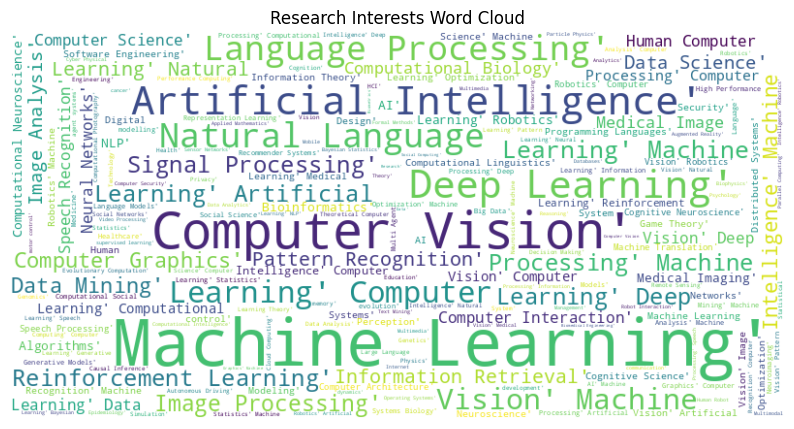

In [7]:
all_interests = ' '.join(data['Research Interests'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_interests)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Research Interests Word Cloud')
plt.axis('off')
plt.show()

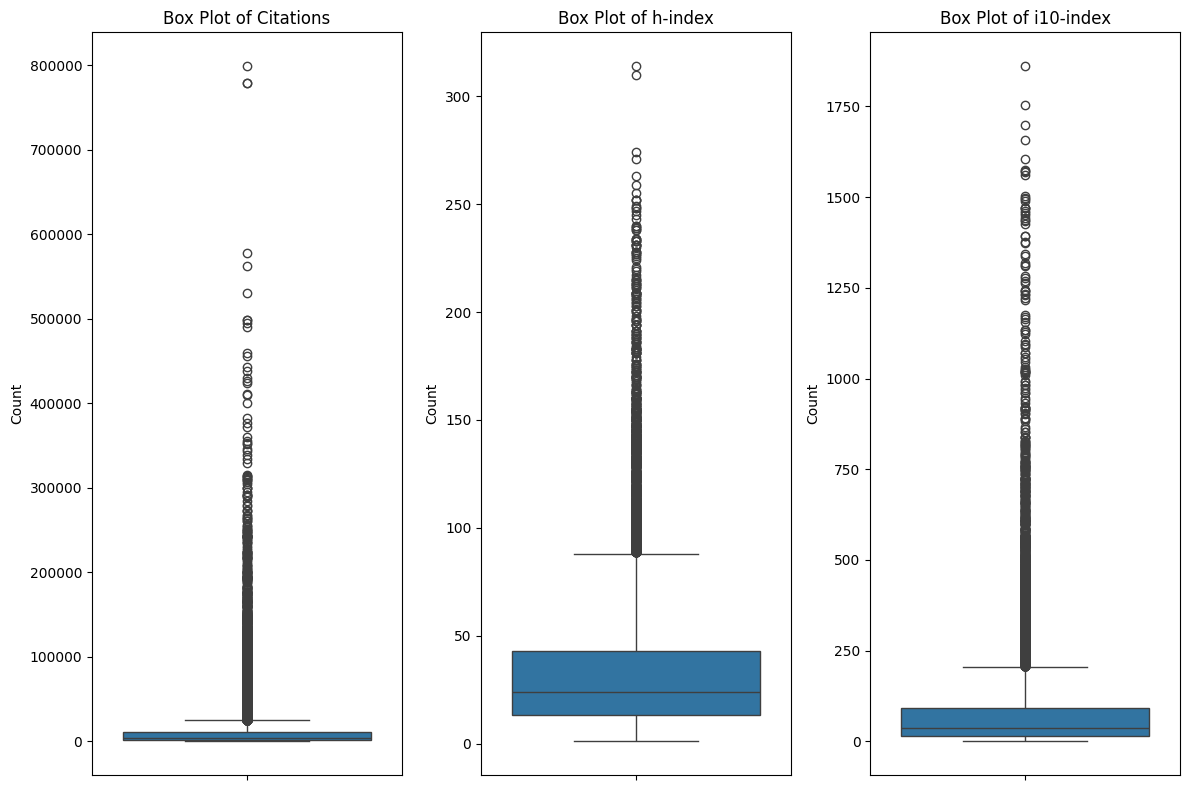

In [8]:
numerical_columns = ['Citations', 'h-index', 'i10-index']

filtered_data = data.dropna(subset=numerical_columns)

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(data=filtered_data[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

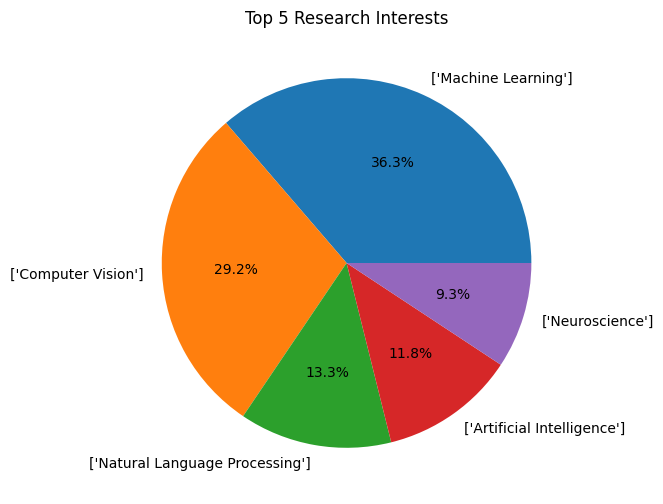

In [9]:
filtered_data = data[data['Research Interests'].apply(lambda x: ',' not in x and x.strip() != '[]')]

research_interest_counts = filtered_data['Research Interests'].value_counts()

top_5_interests = research_interest_counts.head(5)

plt.figure(figsize=(8, 6))
plt.pie(top_5_interests, labels=top_5_interests.index, autopct='%1.1f%%')
plt.title('Top 5 Research Interests')
plt.show()

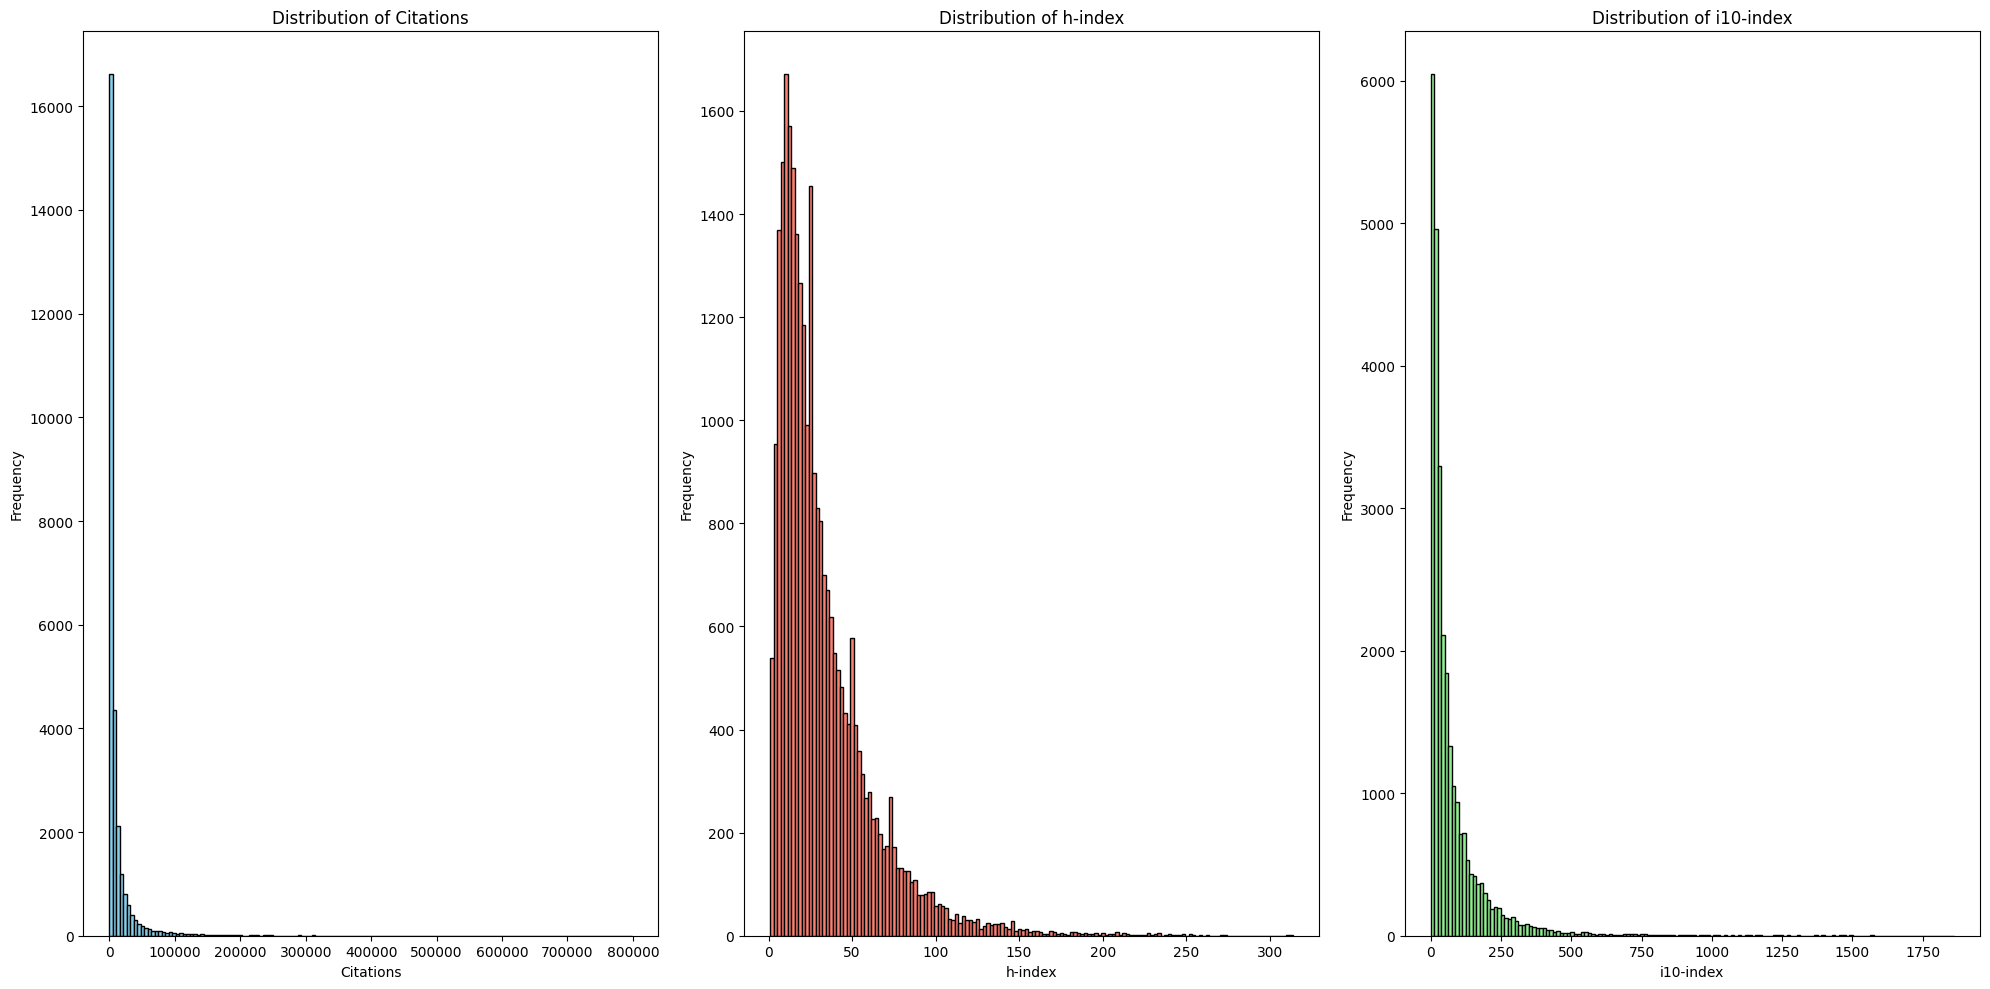

In [10]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)

plt.hist(data['Citations'], bins=150, color='skyblue', edgecolor='black')
plt.title('Distribution of Citations')
plt.xlabel('Citations')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data['h-index'], bins=150, color='salmon', edgecolor='black')
plt.title('Distribution of h-index')
plt.xlabel('h-index')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data['i10-index'], bins=150, color='lightgreen', edgecolor='black')
plt.title('Distribution of i10-index')
plt.xlabel('i10-index')
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

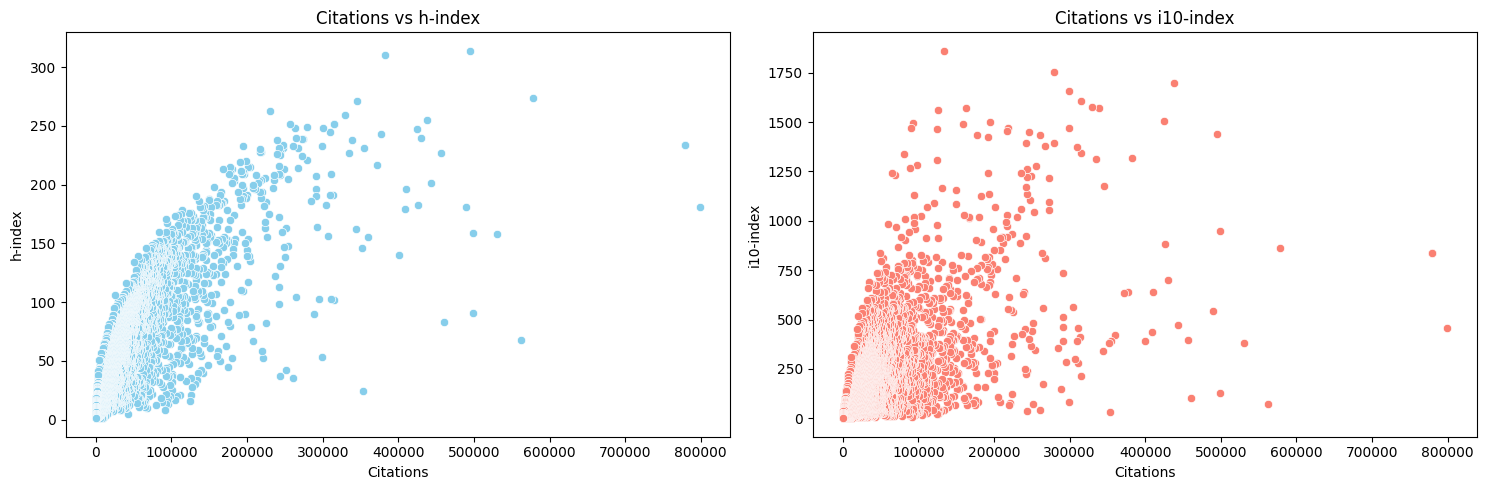

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)

sns.scatterplot(x='Citations', y='h-index', data=data, color='skyblue')
plt.title('Citations vs h-index')
plt.subplot(1, 2, 2)
sns.scatterplot(x='Citations', y='i10-index', data=data, color='salmon')
plt.title('Citations vs i10-index')
plt.tight_layout()
plt.show()

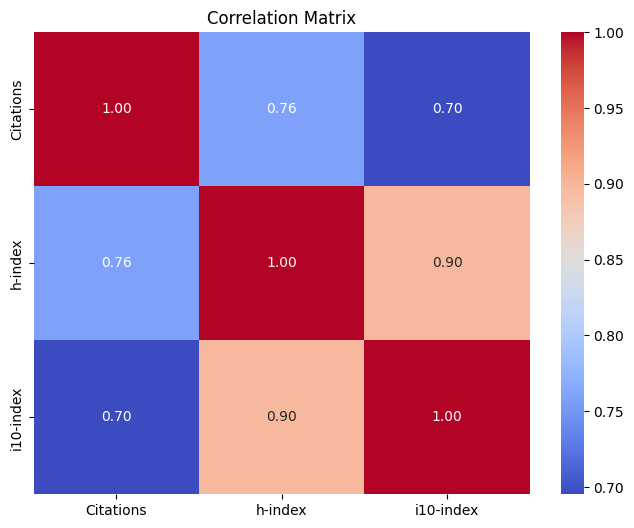

In [12]:
correlation_matrix = data[['Citations', 'h-index', 'i10-index']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()